<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\anubh\AppData\Local\Temp\ipykernel_21340\2031263985.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [2]:
# boston_df=pd.read_csv('assets/boston_housing.csv', usecols=[i for i in range(1, 14)])
boston_df = pd.read_csv('assets/boston_housing.csv', usecols= lambda x: x != 'Unnamed: 0')
display(boston_df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a boxplot

* Provide a  bar plot for the Charles river variable

* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

* Create a histogram for the pupil to teacher ratio variable

### Median value of owner occupied homes

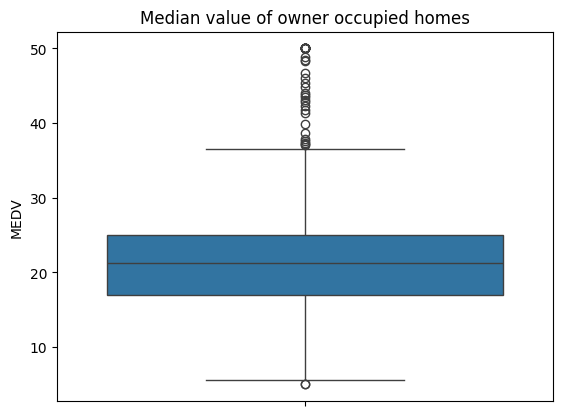

In [3]:
ax = sns.boxplot(boston_df['MEDV'])
plt.title('Median value of owner occupied homes')
plt.show()

### Charles River

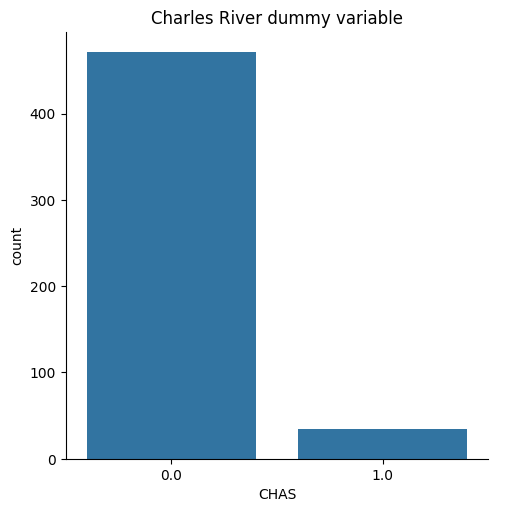

In [4]:
ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title('Charles River dummy variable')
plt.show()

In [5]:
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 101], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
display(boston_df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


### MEDV vs AGE

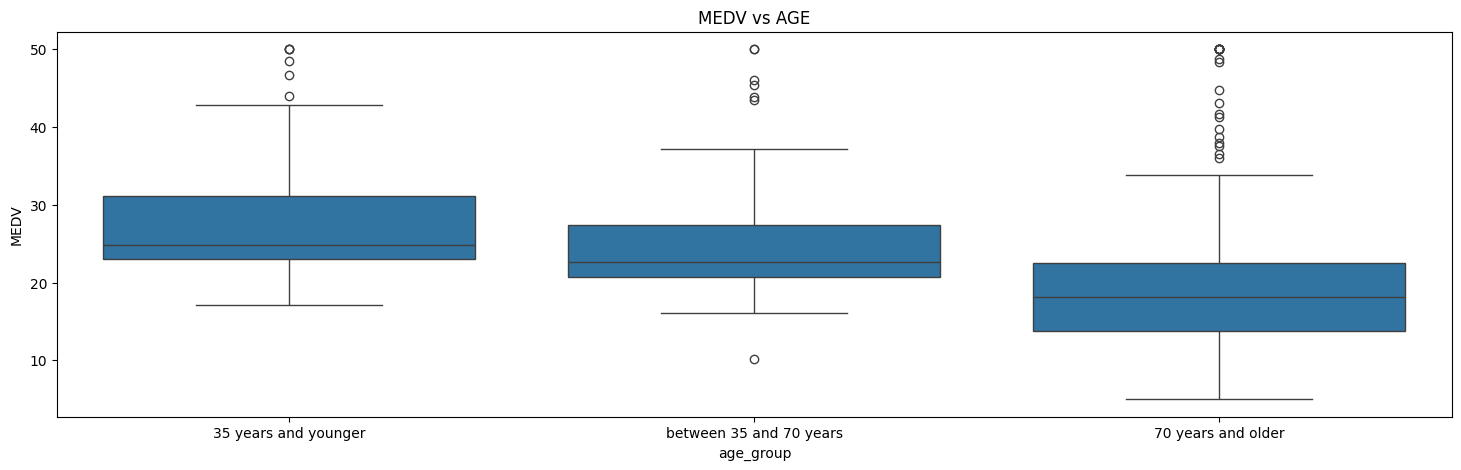

In [6]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('MEDV vs AGE')
plt.show()

### NOX vs INDUS
The scatterplot indicates a positive correlation


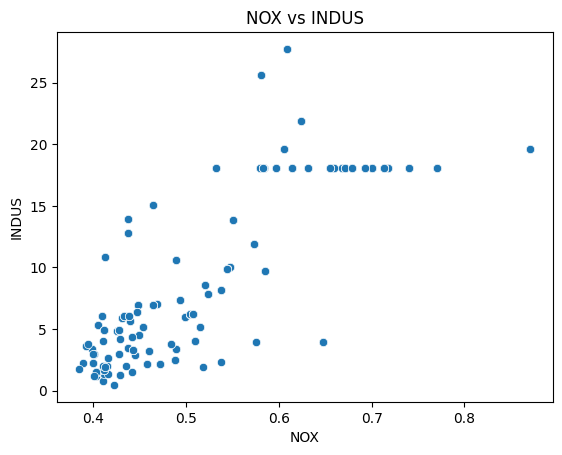

In [7]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('NOX vs INDUS')
plt.show()

### Pupil to teacher ratio

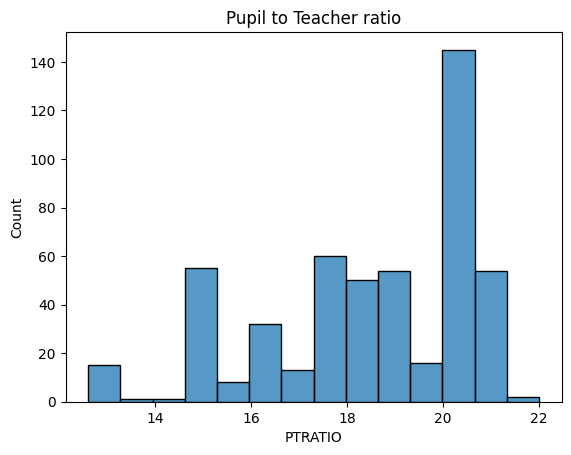

In [8]:
sns.histplot(data=boston_df['PTRATIO'], kde=False)
plt.title('Pupil to Teacher ratio')
plt.show()

## Use the appropriate tests to answer the questions provided.

For each of the following questions;

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

* State your hypothesis.

* Use α = 0.05

* Perform the test Statistics.

* State the conclusion from the test.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

$H_0: \mu _1 = \mu _2$ (There is no difference in median value of houses bounded by Charles river)  
$H_a: \mu _1 \neq \mu _2$ (There is a difference in median value of houses bounded by Charles river)

In [9]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05 we cannot assume equality of variance

In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since the p-value is less than 0.05 we reject the null hypothesis since there is enough proof that there is a statistical difference in Median value of owner occupied homes based on whether it bounds the Charles river or not.

###  Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

$H_0: \mu _1 = \mu _2 = \mu _3$ (The 3 Median values are equal)  
$H_a:$ Atleast one of the medians differ

In [12]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'], 
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the P-value is greater than 0.05 we assume equal variances

In [13]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']

thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']

seventy_higher = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [15]:
f_statistic, p_val = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_higher)
print(f"F_stat : {f_statistic}  P-value : {p_val}")

F_stat : 36.40764999196599  P-value : 1.7105011022702984e-15


Since the p-value is less than 0.05 we reject the null hypothesis since there is significant evidence that at least one of the medians differ

###  Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

$H_0:$ There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town  
$H_a:$ There is a correlation between Nitric oxide concentrations and proportion of non-reatil business acres per town

In [16]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

Since the p-value is less than 0.05 we reject the null hypothesis since there is significant evidence that there is a correlation between nitric oxide concentration and non-retail business acres per town

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

$H_0:$ There is on impact of an additonal weighted distance to the five Boston employment centers on the median value of owner occupied homes  
$H_a:$ There is an impact of an additonal weighted distance to the five Boston employment centers on the median value of owner occupied homes

In [18]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        10:21:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value is less than 0.05 we reject the null hypothesis since there is significant evidence that there is an impact of an additonal weighted distance to the five boston employement centers on the median value of owner occupied homes